In [ ]:
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

In [ ]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

## 이미지 준비 거대고양이

In [ ]:
img_path = '/content/tiger.jpg'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

## 학습된 모델 다운로드

In [ ]:
import requests
model_dir = '/content'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

In [ ]:
res = requests.get(model_url)
with open(model_file, 'wb') as model:
    model.write(res.content)

In [ ]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [ ]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [ ]:
# 사전 학습된 모델의 레이블 클래스
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

In [ ]:
plt.imshow(output)
plt.show()

In [ ]:
# 예측한 모델 값
segvalues

In [ ]:
# 예측한 레이블들
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

In [ ]:
colormap = np.zeros((256,3), dtype=int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1)  << shift
    ind >>= 3

colormap[:20]

In [ ]:
LABEL_NAMES

In [ ]:
colormap[8]

In [ ]:
seg_color = (0,0,64)

## 이미지 추출 확인

In [ ]:
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

## 원본과 겹쳐보기

In [ ]:
img_show = img_orig.copy()
# True, False인 값을 255와 0으로
img_mask = seg_map.astype(np.uint8) * 255
# 255와 0을 적당한 색으로 변경
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
# 원본 이미지와 마스트 합성 원본0.6, 마스트0.4
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 배경 흐리게 하기

In [ ]:
img_orig_blur = cv2.blur(img_orig,(30,30))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 기존에 마스킹된 이미지
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
plt.imshow(img_mask_color)

In [ ]:
# 백그라운드와 반전
img_bg_mask = cv2.bitwise_not(img_mask_color)
plt.imshow(img_bg_mask)

In [ ]:
# 기존 블러된 이미지와 결합 img_bg_mask값이 0
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(img_bg_blur)

## 이미지 합성

In [ ]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

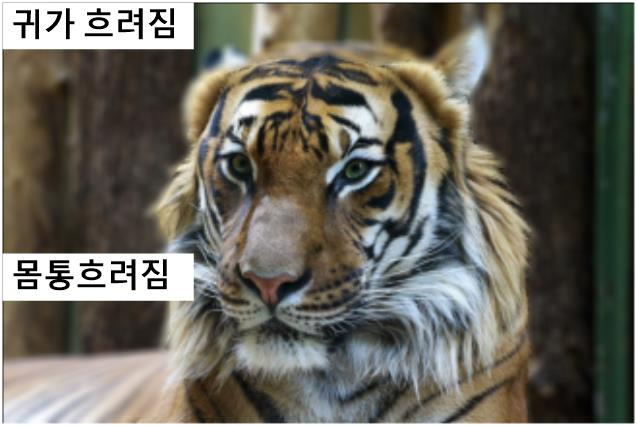